In [40]:
from pymongo import MongoClient
client = MongoClient()
client = MongoClient('localhost',27017)
db = client.AminerDB
data = db.data

In [41]:
import re
import matplotlib.pyplot as plt
import numpy as np

A. Compute the number of distinct authors, publication venues, publications, and citations/references

In [42]:
pipeline = [
    {"$unwind": "$authors"},  # Unwind the authors array
    {"$group": {"_id": "$authors"}},  # Group by author to get distinct authors
    {"$group": {"_id": None, "total_authors": {"$sum": 1}}}  # Count the distinct authors
]

result = data.aggregate(pipeline)
for doc in result:
    print("Total distinct authors:", doc["total_authors"])


Total distinct authors: 1651650


In [43]:
pipeline = [
    {"$group": {"_id": "$venue"}},  # Group by venue to get distinct venues
    {"$group": {"_id": None, "total_venues": {"$sum": 1}}}  # Count the distinct venues
]

result = data.aggregate(pipeline)
for doc in result:
    print("Total distinct venues:", doc["total_venues"])


Total distinct venues: 273330


In [44]:
pipeline = [
    {"$group": {"_id": "$publication"}},  # Group by publication to get distinct publications
    {"$group": {"_id": None, "total_publications": {"$sum": 1}}}  # Count the distinct publications
]

result = data.aggregate(pipeline)
for doc in result:
    print("Total distinct publications:", doc["total_publications"])


Total distinct publications: 2385058


In [45]:
pipeline = [
    {"$unwind": "$citations"},  # Unwind the citations array
    {"$group": {"_id": "$citations"}},  # Group by citation to get distinct citations
    {"$group": {"_id": None, "total_citations": {"$sum": 1}}}  # Count the distinct citations
]

result = data.aggregate(pipeline)
for doc in result:
    print("Total distinct citations:", doc["total_citations"])


Total distinct citations: 1007495


B. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do you notice?

In [20]:
regex_pattern = re.compile("Principles and Practice of Knowledge Discovery in Databases", re.IGNORECASE)

query = {"venue": {"$regex": regex_pattern}}

result = data.find(query, {"venue": 1})

# Print the publication venue names
for doc in result:
    print(doc["venue"])


PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice o

PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases
PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases
PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases
PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases
PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases
PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases
PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases
PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases
PKDD 2007 Proceedings of the 11th European conference on Princip

The same conference happens each year. Hence its name is different in the dataset. Hence the count of venue is inaccurate as it is increased. But the count of authors is most likely to be accurate (in case if the same authors name is entered incorrectly in any record). And counts of publications and citations is correct as I counted the IDs

C. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

In [95]:
pipeline = [
    {"$unwind": "$authors"},  
    {"$group": {"_id": "$authors", "publications": {"$push": "$publication"}}},  
    {"$project": {"_id":0,"author": "$_id", "publications": 1}}  
]
# "num_publications": {"$size": "$publications"}
result = data.aggregate(pipeline)

In [96]:
authors = []
num_publications = []
publications = []
for doc in result:
    authors.append(doc["author"])
    num_publications.append(len(doc["publications"]))
    publications.append(doc["publications"])

In [107]:
for i in range(len(num_publications)):
    if(num_publications[i] > 1000):
        print(i,num_publications[i],authors[i])

110 4458 -
266224 1560 Computer Staff
589476 1760 III
747361 8866 Jr.
871509 1208 Linux Journal Staff
1370691 1446 Staff
1523750 1324 Wei Wang


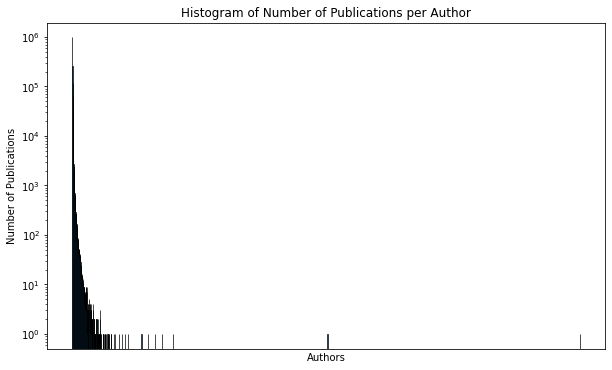

In [82]:
plt.figure(figsize=(10, 6)) 

plt.hist(num_publications, bins=range(1, max(num_publications) + 1), edgecolor='black', alpha=0.7,log=True)

plt.title('Histogram of Number of Publications per Author')
plt.xlabel('Authors')
plt.ylabel('Number of Publications')

plt.xticks([]) 
plt.xlabel('Authors')  

plt.show()

D. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [110]:
np_num_publications = np.array(num_publications)

In [113]:
print(f"Mean {np.mean(np_num_publications)}\
\nSTD {np.std(np_num_publications)}\
\nQ1 {np.percentile(np_num_publications, 25)}\
\nQ2 {np.median(np_num_publications)}\
\nQ3 {np.percentile(np_num_publications, 75)}")

Mean 3.462284987739533
STD 12.765834525773869
Q1 1.0
Q2 1.0
Q3 3.0


The fact that the median and Q1 are both at 1.0, and the mean is much higher, strongly suggests a skewed distribution with a long tail to the right. This right skew indicates that while most of the data are clustered around the lower numbers (below 3.0), there are enough high numbers (outliers) to pull the mean up significantly, without affecting the median similarly.

E. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

In [ ]:
#  histogram of the number of publications per venue

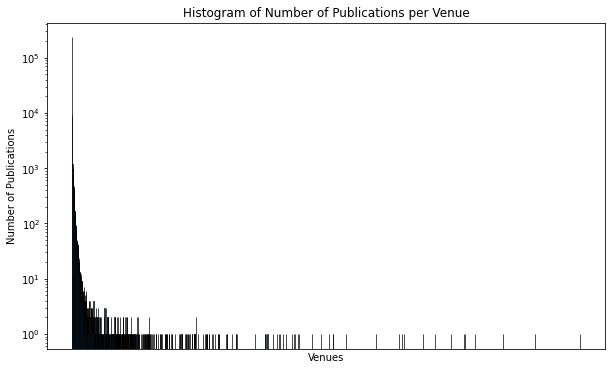

In [114]:
pipeline = [  
    {"$group": {"_id": "$venue", "publications": {"$push": "$publication"}}},  
    {"$project": {"_id":0,"venue": "$_id", "publications": 1}}  
]

result = data.aggregate(pipeline)

venues = []
num_publications = []
for doc in result:
    venues.append(doc["venue"])
    num_publications.append(len(doc["publications"]))
    
plt.figure(figsize=(10, 6)) 

plt.hist(num_publications, bins=range(1, max(num_publications) + 1), edgecolor='black', alpha=0.7,log=True)

plt.title('Histogram of Number of Publications per Venue')
plt.xlabel('Venues')
plt.ylabel('Number of Publications')

plt.xticks([]) 
plt.xlabel('Venues')  

plt.show()

In [115]:
# mean, standard deviation, median, Q1, and Q3
np_num_publications = np.array(num_publications)
print(f"Mean {np.mean(np_num_publications)}\
\nSTD {np.std(np_num_publications)}\
\nQ1 {np.percentile(np_num_publications, 25)}\
\nQ2 {np.median(np_num_publications)}\
\nQ3 {np.percentile(np_num_publications, 75)}")

Mean 8.725957633629678
STD 106.79592557022558
Q1 1.0
Q2 1.0
Q3 1.0


In [116]:
# What is the venue with the largest number of publications in the dataset?
largest_num_of_pub = max(num_publications)

for i in range(len(num_publications)):
    if(num_publications[i]==largest_num_of_pub):
        print(i,num_publications[i],venues[i])

118378 12754 IEEE Transactions on Information Theory


F. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

In [126]:
# Plot a histogram of number of references (number of publications a publication refers to) per publication
pipeline = [  
    #{ "$unwind": "$citations"},
    {"$group": {"_id": "$publication", "references": {"$push": "$citations"}}}, 
    {"$project": {"_id":0,"publication": "$_id", "references": 1}} 
]

result = data.aggregate(pipeline)

In [128]:
publication = []
references = []
num_references = []
for doc in result:
    publication.append(doc["publication"])
    references.append(doc["references"])

In [152]:
num_references = []
for refs in references:
    if len(refs)>0:
        num_references.append(len(refs[0]))
    else:
        num_references.append(0)

In [205]:
len(num_references)==len(references)==len(publication)

True

In [203]:
len(np.unique(np.array(num_references)))

245

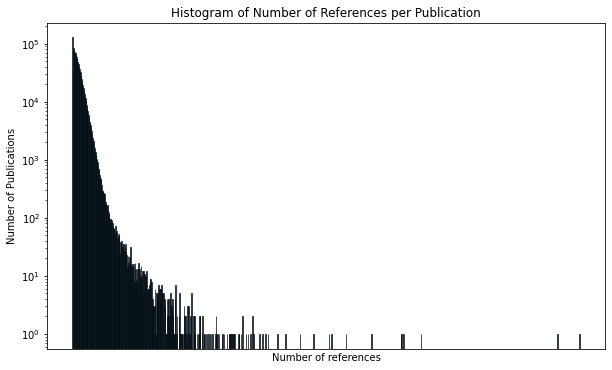

In [194]:
plt.figure(figsize=(10, 6)) 

plt.hist(num_references, bins=range(1, max(num_references) + 1), edgecolor='black', alpha=0.7,log=True)

plt.title('Histogram of Number of References per Publication')
plt.ylabel('Number of Publications')

plt.xticks([]) 
plt.xlabel('Number of references')  

plt.show()
# height of each bin shows how many publications have that exact number of references

In [181]:
# Plot a histogram of number of citations (number of publications referring to a publication) per publication
pipeline = [
    {"$unwind": "$citations"},  
    {"$group": {"_id": "$citations","count":{"$sum":1}}},  
    {"$sort":{"count":1}},
    {"$project": {"_id":0,"citation": "$_id", "count": 1}}, 
]

result = data.aggregate(pipeline)

In [182]:
cited_publications = {}
for doc in result:
    cited_publications[doc["citation"]] = doc["count"]

In [199]:
len(cited_publications)

1007495

In [187]:
# All other publications are not even cited once. Their count is 0.
num_citations_per_pub = []
for pub in publication:
    if pub not in cited_publications:
        num_citations_per_pub.append(0)
    else:
        num_citations_per_pub.append(cited_publications[pub])
        

In [213]:
np.unique(np.array(num_citations_per_pub))

array([     0,      1,      2,      3,      4,      5,      6,      7,
            8,      9,     10,     11,     12,     13,     14,     15,
           16,     17,     18,     19,     20,     21,     22,     23,
           24,     25,     26,     27,     28,     29,     30,     31,
           32,     33,     34,     35,     36,     37,     38,     39,
           40,     41,     42,     43,     44,     45,     46,     47,
           48,     49,     50,     51,     52,     53,     54,     55,
           56,     57,     58,     59,     60,     61,     62,     63,
           64,     65,     66,     67,     68,     69,     70,     71,
           72,     73,     74,     75,     76,     77,     78,     79,
           80,     81,     82,     83,     84,     85,     86,     87,
           88,     89,     90,     91,     92,     93,     94,     95,
           96,     97,     98,     99,    100,    101,    102,    103,
          104,    105,    106,    107,    108,    109,    110,    111,
      

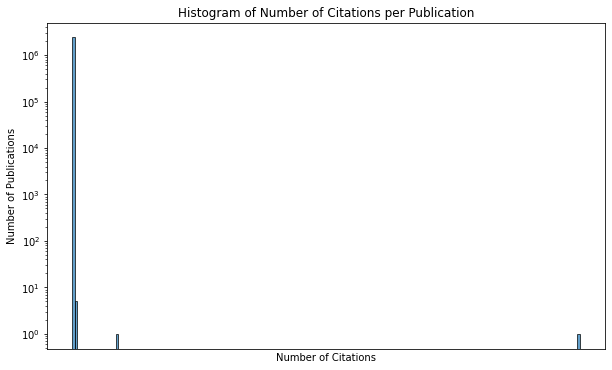

In [204]:
plt.figure(figsize=(10, 6)) 

plt.hist(num_citations_per_pub, bins=200, edgecolor='black', alpha=0.7,log=True)

plt.title('Histogram of Number of Citations per Publication')
plt.ylabel('Number of Publications')

plt.xticks([]) 
plt.xlabel('Number of Citations')  

plt.show()

In [207]:
max(num_references)

809

In [208]:
# What is the publication with the largest number of references? 
for i in range(len(publication)):
    if(num_references[i]==809):
        print(f"Publication with largest number of references: {publication[i]}")
        break

Publication with largest number of references: 2015217


In [212]:
# What is the publication with the largest number of citations? 
max_citations = max(num_citations_per_pub)
for i in range(len(publication)):
    if(num_citations_per_pub[i]==max_citations):
        print(f"Publication with largest number of citations: {publication[i]}. Max citations: {max_citations}")
        break

Publication with largest number of citations: 2135000. Max citations: 938039


In [ ]:
# Do these make sense?

Based on the provided dataset size and the nature of academic publications, the reported figures for the highest number of references and citations are plausible. In large academic datasets, outliers with exceptionally high numbers of references or citations are expected due to the nature of scientific impact and the diversity of publication types (reviews, meta-analyses, seminal research papers).

G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

In [ ]:
# Group by venue, fetch publication
# for each publication we already know number of citations (cited_publications dict)

In [216]:
pipeline = [  
    {"$group": {"_id": "$venue", "publications": {"$push": "$publication"}}},  
    {"$project": {"_id":0,"venue": "$_id", "publications": 1}}  
]

result = data.aggregate(pipeline)

impact_factor_of_venue = {}

for doc in result:
    num_of_citations = 0
    for pub in doc["publications"]:
        if pub in cited_publications:
            num_of_citations += cited_publications[pub]
    impact_factor_of_venue[doc["venue"]] = num_of_citations/len(doc["publications"])

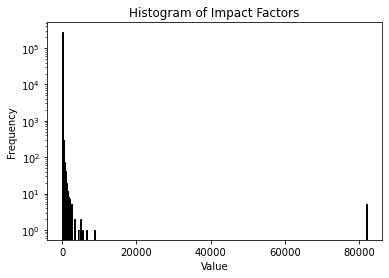

In [226]:
# histogram
plt.hist(impact_factor_of_venue.values(), bins=300, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Impact Factors')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.yscale('log')  # Use logarithmic scale for y-axis

# Show the plot
plt.show()

H. What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)

In [225]:
max_key = max(impact_factor_of_venue, key=impact_factor_of_venue.get)
print(max_key,impact_factor_of_venue[max_key])

AI EDAM 82080.0


Nope. I do not belive this number. Impact factor of 10+ is pretty rare.

I. Now repeat the calculation from item G, but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

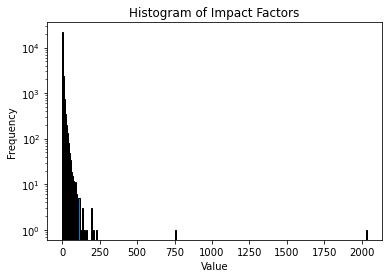

In [231]:
# Now repeat the calculation from item G, but restrict the calculation to venues with at least 10 publications. 
# How does your histogram change?
pipeline = [  
    {"$group": {"_id": "$venue", "publications": {"$push": "$publication"}}},  
    {"$project": {"_id":0,"venue": "$_id", "publications": 1}}  
]

result = data.aggregate(pipeline)

impact_factor_of_venue_atleast_10 = {}

for doc in result:
    num_of_citations = 0
    for pub in doc["publications"]:
        if pub in cited_publications:
            num_of_citations += cited_publications[pub]
    
    if(len(doc["publications"]) >= 10):
        impact_factor_of_venue_atleast_10[doc["venue"]] = num_of_citations/len(doc["publications"])

# histogram
plt.hist(impact_factor_of_venue_atleast_10.values(), bins=300, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Impact Factors')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.yscale('log')  # Use logarithmic scale for y-axis

# Show the plot
plt.show()

Histogram has changed. The values are till 2k instead of 80k. Its shape is similar to that of the previous one.

In [232]:
# List the citation counts for all publications from the venue with the highest impact factor.
max_key = max(impact_factor_of_venue_atleast_10, key=impact_factor_of_venue_atleast_10.get)
print(max_key,impact_factor_of_venue_atleast_10[max_key])

Proceedings of the 19th ACM SIGKDD international conference on Knowledge discovery and data mining 2033.2029702970297


In [235]:
pipeline = [  
    {"$group": {"_id": "$venue", "publications": {"$push": "$publication"}}},  
    {"$project": {"_id":0,"venue": "$_id", "publications": 1}}  
]

result = data.aggregate(pipeline)
for doc in result:
    num_of_citations = 0
    if doc["venue"] == max_key:
        for pub in doc["publications"]:
            if pub in cited_publications:
                num_of_citations += cited_publications[pub]
        print(f"Citation counts: {num_of_citations}")
        break

Citation counts: 410707


In [242]:
# How does the impact factor (mean number of citations) compare to the median number of citations?
print(f"Mean number of citations {np.mean(np.array(num_citations_per_pub))}\
\nMedian number of citations {np.median(np.array(num_citations_per_pub))}")


Mean number of citations 4.0552024311358466
Median number of citations 0.0


The mean is significantly more than median. The distribution of number of citations is skewed.

J. Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

In [243]:
db = client.AminerTimeSeriesDB
data = db.data

In [305]:
# number of references per year
pipeline = [  
    {"$group": {"_id": "$year", "references": {"$push": "$citations"}}}, 
    {"$project": {"_id":0,"year": "$_id", "references": 1}} 
]

result = data.aggregate(pipeline)

In [306]:
year = []
references = []
num_references = []
for doc in result:
    year.append(doc["year"])
    references.append(doc["references"])

In [326]:
#year.pop(0)
#references.pop(0)

In [331]:
len(references)==len(year)
# [['2135000'], ['2135000'], ['2135000'], ['2135000'], ['2135000'], ['2135000']]

True

In [346]:
# references is list of list of references of each publication
# avg number of references per publication is sum of length of each list div by len of references
avg_num_ref_per_pub_per_year = {}
for i in range(len(year)):
    s = 0
    if(len(references[i]) == 0):
        avg_num_ref_per_pub_per_year[year[i]] = 0
    else:
        for refs in references[i]:
            s += len(refs)
        avg = s/len(references[i])
        avg_num_ref_per_pub_per_year[year[i]] = avg
    

In [382]:
avg_num_ref_per_pub_per_year['1967']

2.498533724340176

In [372]:
avg_num_ref_per_pub_per_year.keys()

dict_keys(['1936', '1938', '1941', '1945', '1947', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])

In [383]:
pipeline = [
    {"$unwind": "$citations"},
    {"$group": {"_id": {"year": "$year", "publication": "$citations"}, "num_citations": {"$sum": 1}}},
    {"$group": {"_id": "$_id.year", "average_citations": {"$avg": "$num_citations"}}},
    {"$sort": {"_id": 1}},
    {"$project": {"_id": 0, "year": "$_id", "average_citations": 1}}
]

result = list(data.aggregate(pipeline))


In [385]:
avg_num_cit_per_pub_per_year = {}

for r in result:
    if r['year'] is not None:
        avg_num_cit_per_pub_per_year[r['year']] = r['average_citations']
    

In [386]:
for y in year:
    if y not in avg_num_cit_per_pub_per_year:
        avg_num_cit_per_pub_per_year[y] = 0

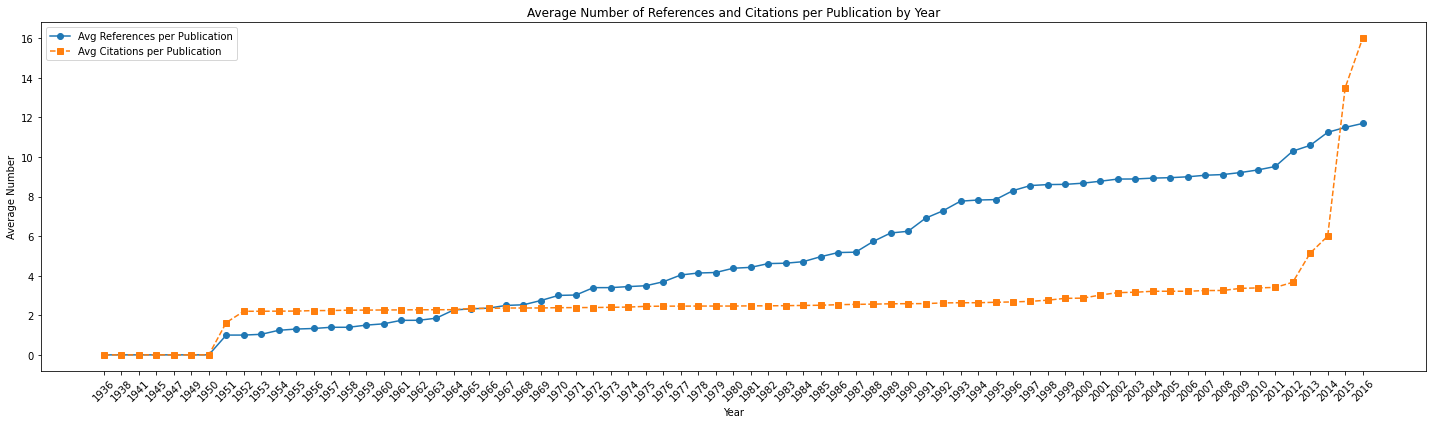

In [400]:
# Extract keys (years) and values from the dictionaries
years_ref = list(avg_num_ref_per_pub_per_year.keys())
values_ref = list(avg_num_ref_per_pub_per_year.values())

years_cit = list(avg_num_cit_per_pub_per_year.keys())
values_cit = list(avg_num_cit_per_pub_per_year.values())

years_ref.sort()
values_ref.sort()
years_cit.sort()
values_cit.sort()

# Create the plot
plt.figure(figsize=(20, 6))

# Plot avg_num_ref_per_pub_per_year
plt.plot(years_ref, values_ref, marker='o', linestyle='-', label='Avg References per Publication')

# Plot avg_num_cit_per_pub_per_year
plt.plot(years_cit, values_cit, marker='s', linestyle='--', label='Avg Citations per Publication')

# Add titles and labels
plt.title('Average Number of References and Citations per Publication by Year')
plt.xlabel('Year')
plt.ylabel('Average Number')
# Customize x-axis ticks
plt.xticks(ticks=years_ref, labels=[str(year) for year in years_ref], rotation=45)

plt.legend()  # Add a legend to differentiate the lines

# Display the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [401]:
# Number of references have been increasing
# But number of citations remained stagnant. They increased only recently (last 10 yrs)